# what is KNN algorithm:

# which factor to find out in KNN

# Interview Questions:

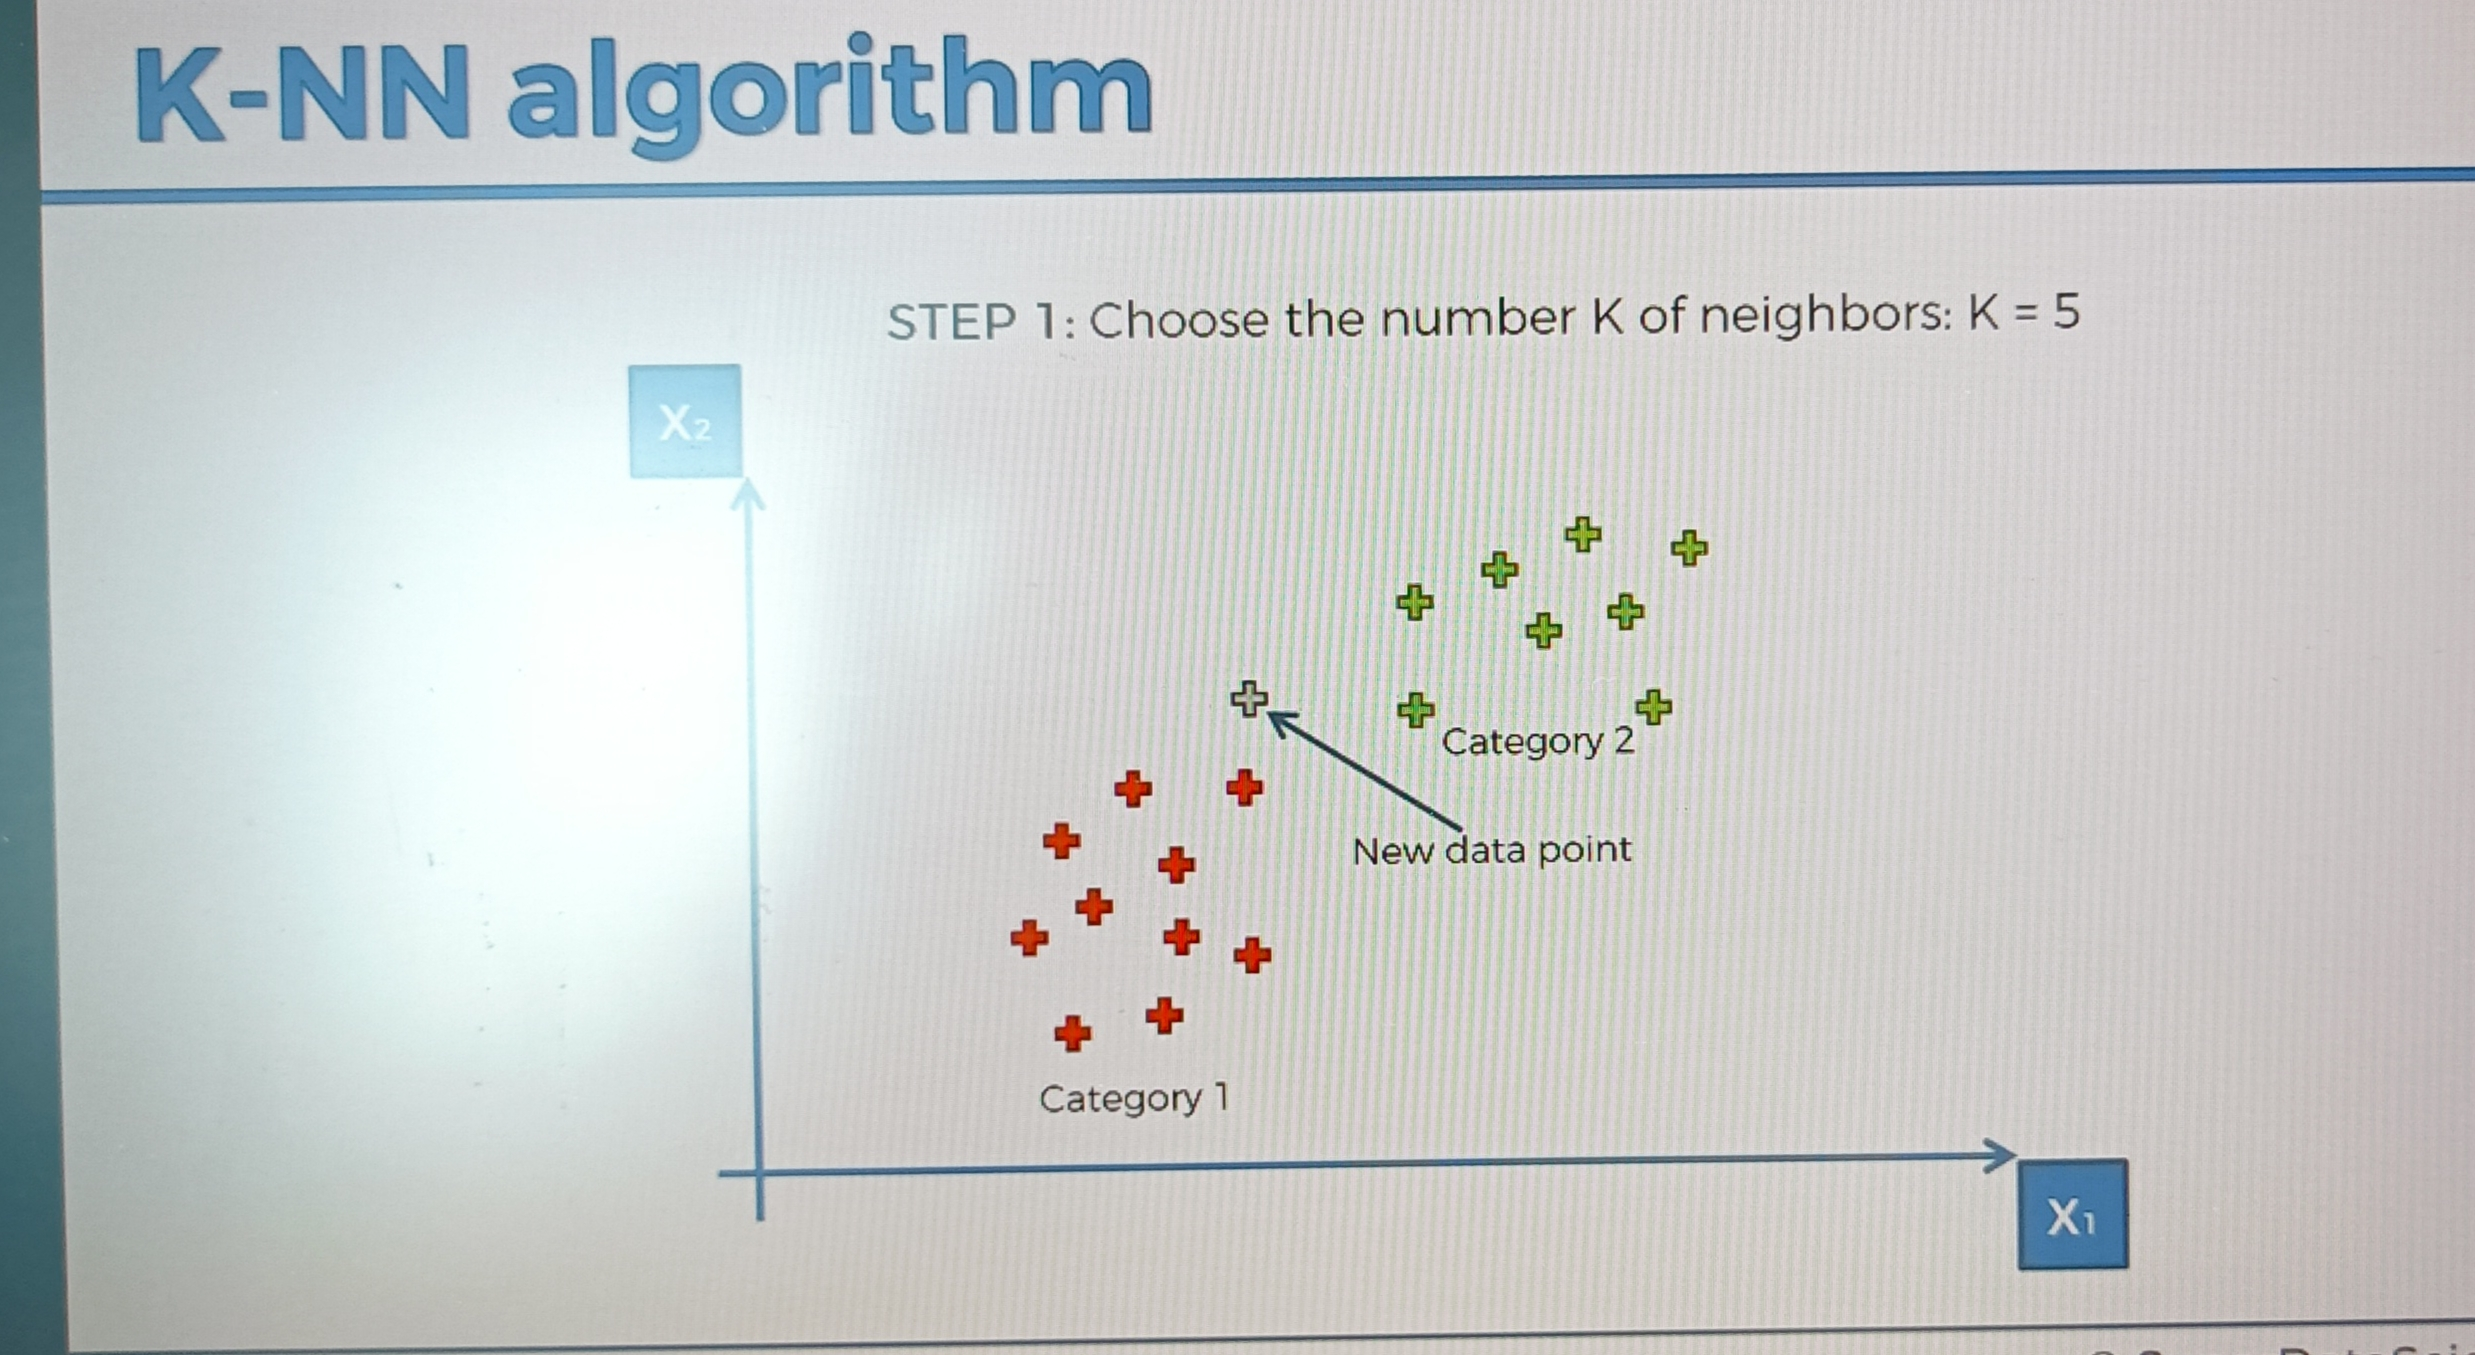

In [18]:
from IPython.display import Image
Image(filename = "C:/Users/thiru/Downloads/KNN1.jpg",width = 600,height = 600)

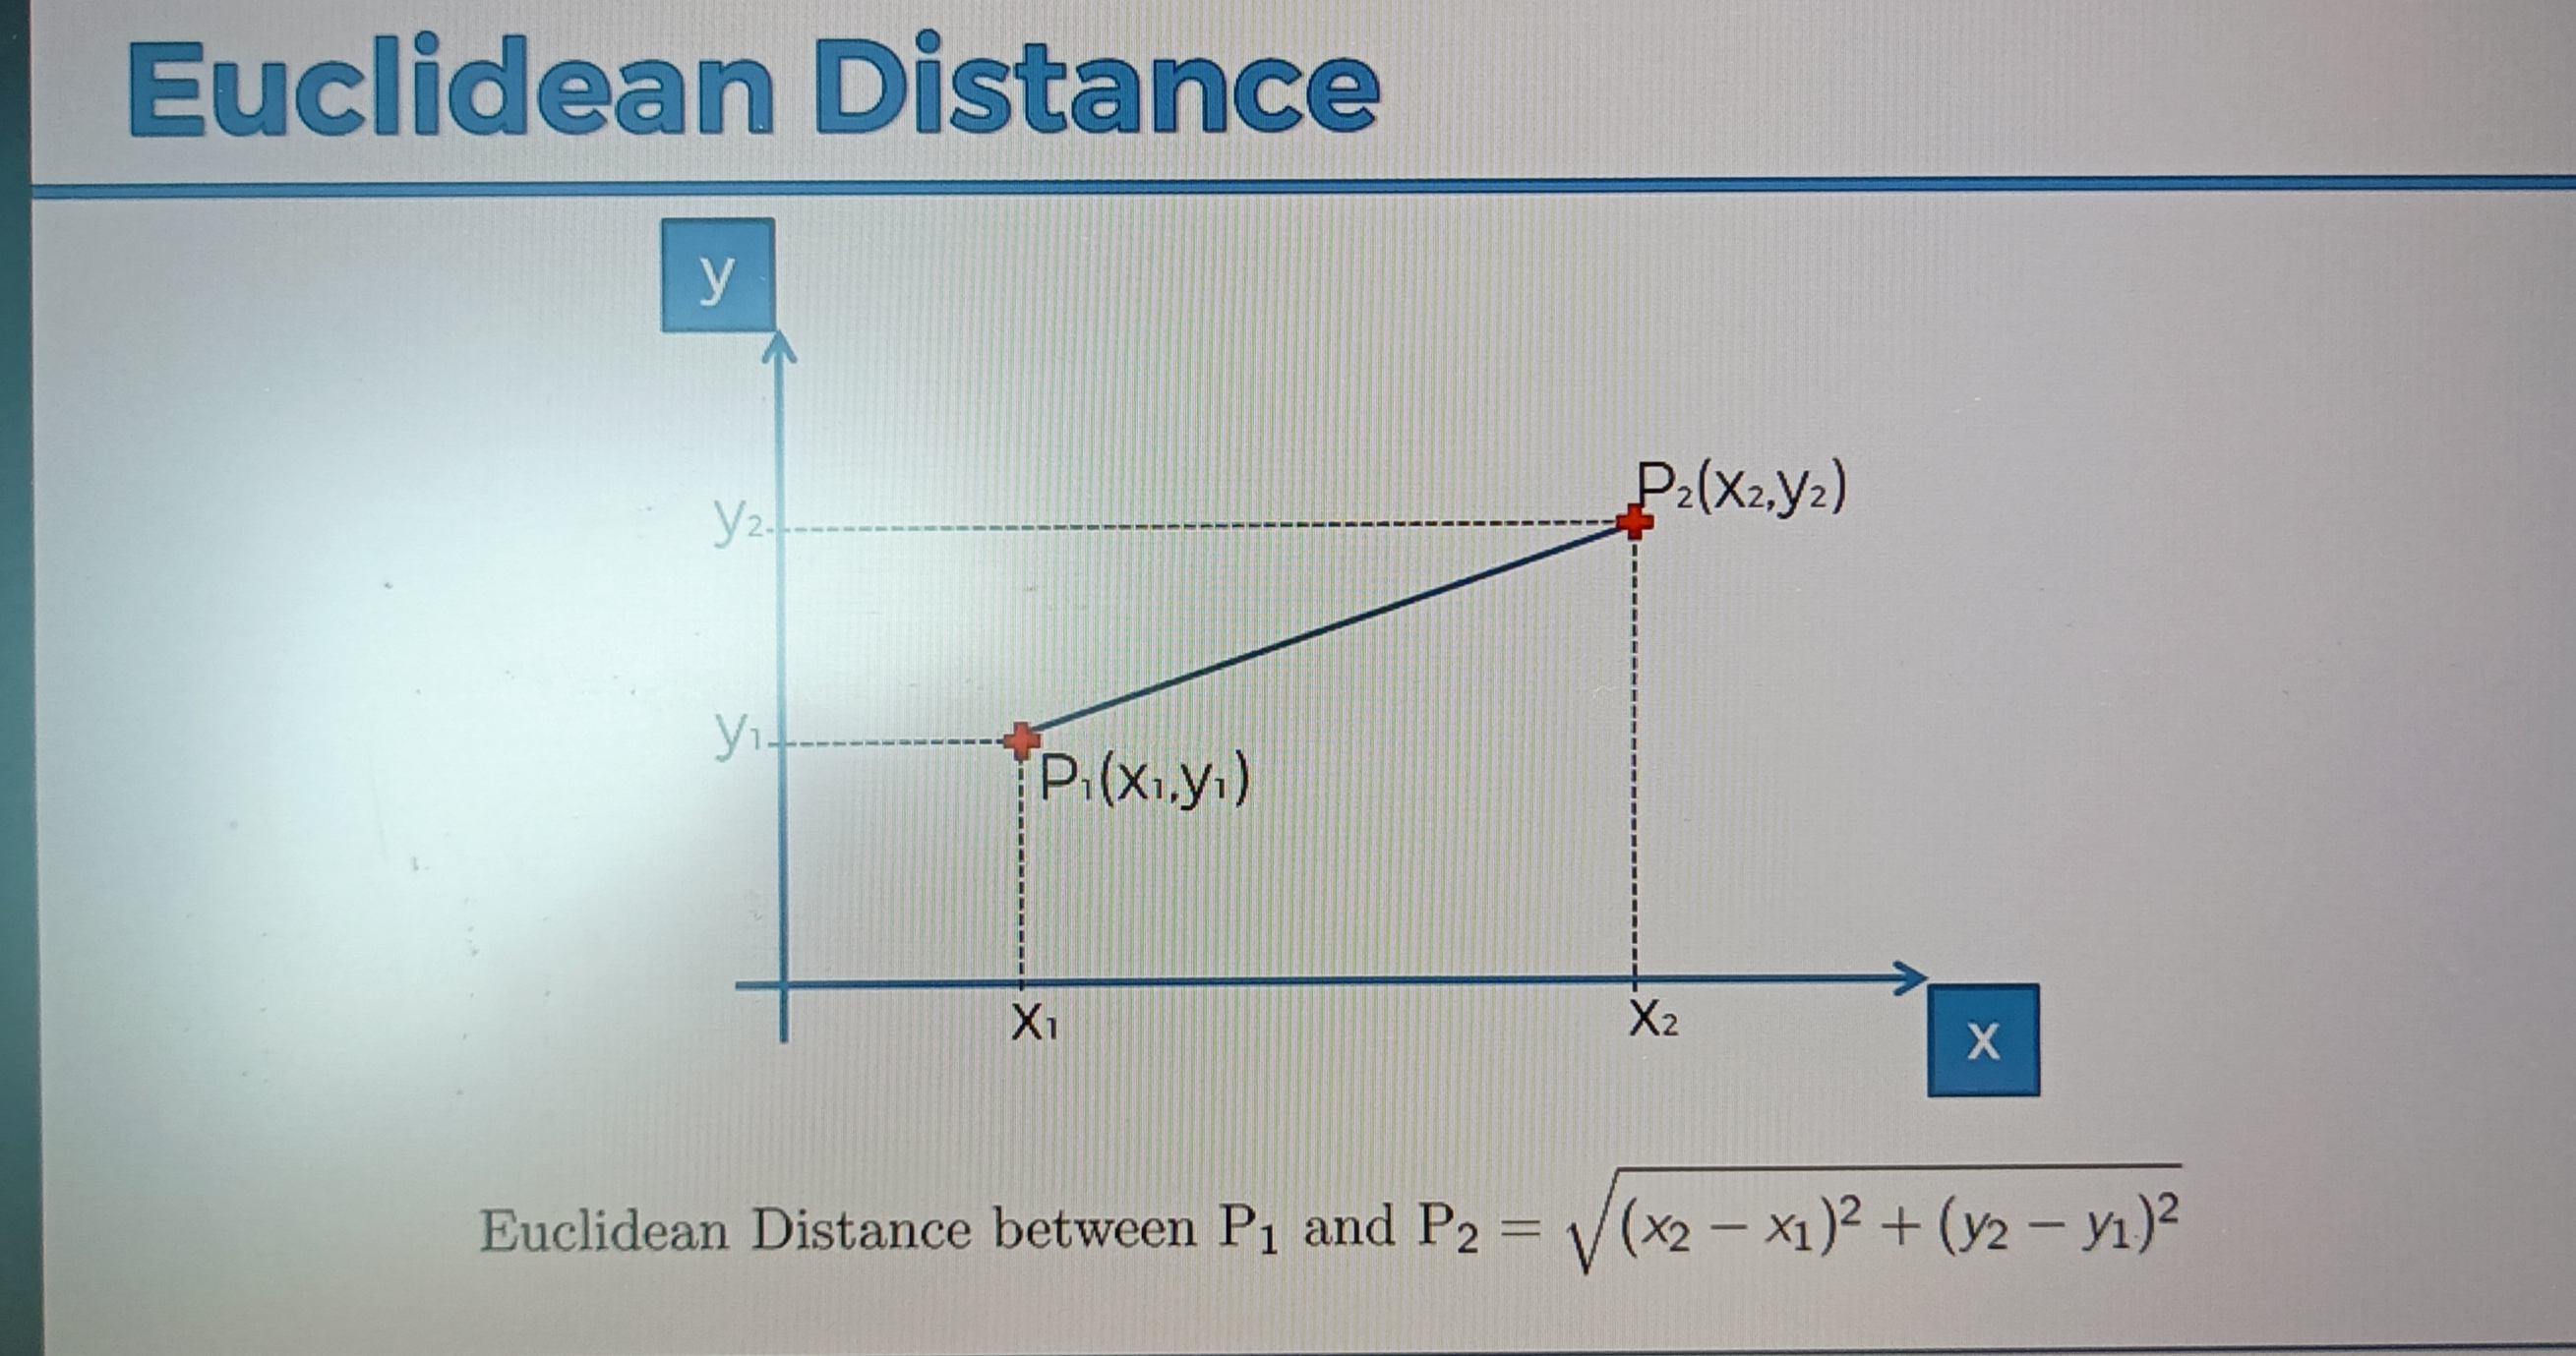

In [19]:
from IPython.display import Image
Image(filename = "C:/Users/thiru/Downloads/KNN2.jpg",width = 600,height = 600)

# Import required Libraries:

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
data = pd.read_csv("C:/data Science/Machine Learning-A-Z-Codes-Datasets/Machine Learning A-Z (Codes and Datasets)/Part 3 - Classification/Section 15 - K-Nearest Neighbors (K-NN)\Python/Social_Network_Ads.csv")

In [22]:
data

Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]

In [23]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

# Splitting the data into training & testing

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state = 0)

In [25]:
print(X_train)

[[    58 144000]
 [    59  83000]
 [    24  55000]
 [    26  35000]
 [    58  38000]
 [    42  80000]
 [    40  75000]
 [    59 130000]
 [    46  41000]
 [    41  60000]
 [    42  64000]
 [    37 146000]
 [    23  48000]
 [    25  33000]
 [    24  84000]
 [    27  96000]
 [    23  63000]
 [    48  33000]
 [    48  90000]
 [    42 104000]
 [    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]
 [    35  25000]
 [    35  50000]
 [    42  73000]
 [    47  49000]
 [    59  29000]
 [    49  65000]
 [    45 131000]
 [    31  89000]
 [    46  82000]
 [    47  51000]
 [    26  15000]
 [    60 102000]
 [    38 112000]
 [    40 107000]
 [    42  53000]
 [    35  59000]
 [    48  41000]
 [    48 134000]
 [    38 113000]
 [    29 148000]
 [    26  15000]
 [    60  42000]
 [    24  19000]
 [    42 149000]
 [    46  96000]
 [    28  59000]
 [    39  96000]
 [    28  89000]
 [    41  7200

In [26]:
print(X_test)

[[    30  87000]
 [    38  50000]
 [    35  75000]
 [    30  79000]
 [    35  50000]
 [    27  20000]
 [    31  15000]
 [    36 144000]
 [    18  68000]
 [    47  43000]
 [    30  49000]
 [    28  55000]
 [    37  55000]
 [    39  77000]
 [    20  86000]
 [    32 117000]
 [    37  77000]
 [    19  85000]
 [    55 130000]
 [    35  22000]
 [    35  47000]
 [    47 144000]
 [    41  51000]
 [    47 105000]
 [    23  28000]
 [    49 141000]
 [    28  87000]
 [    29  80000]
 [    37  62000]
 [    32  86000]
 [    21  88000]
 [    37  79000]
 [    57  60000]
 [    37  53000]
 [    24  58000]
 [    18  52000]
 [    22  81000]
 [    34  43000]
 [    31  34000]
 [    49  36000]
 [    27  88000]
 [    41  52000]
 [    27  84000]
 [    35  20000]
 [    43 112000]
 [    27  58000]
 [    37  80000]
 [    52  90000]
 [    26  30000]
 [    49  86000]
 [    57 122000]
 [    34  25000]
 [    35  57000]
 [    34 115000]
 [    59  88000]
 [    45  32000]
 [    29  83000]
 [    26  80000]
 [    49  2800

In [27]:
print(y_train)

[1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1
 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0
 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0
 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0
 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1
 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1
 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0]


In [28]:
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]


# Feature Scaling:

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the KNN model to training set

In [30]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski',p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

# predict the test result:

In [31]:
y_pred = classifier.predict(X_test)

In [32]:
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]


# predict a new result:

In [33]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


In [34]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]


# Making the confusion matrix

In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[55  3]
 [ 1 21]]


In [37]:
accuracy_score(y_test,y_pred)

0.95

# Visualising the training set result:

In [38]:
from matplotlib.colors import ListedColormap

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


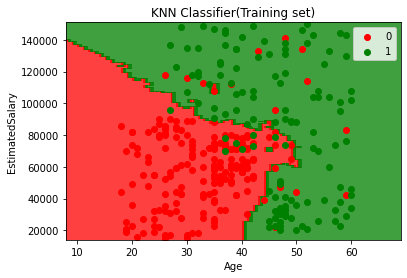

In [41]:
x_set,y_set = sc.inverse_transform(X_train),y_train
X1,X2 = np.meshgrid(np.arange(start = x_set[:,0].min()-10, stop = x_set[:,0].max()+10,step = 1),
                   np.arange(start = x_set[:,1].min()-1000, stop = x_set[:,1].max()+1000,step = 1))
plt.contourf(X1,X2,classifier.predict(sc.transform(np.array([X1.ravel(),X2.ravel()]).T)).reshape(X1.shape),
        alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0],x_set[y_set == j,1],c = ListedColormap(('red','green'))(i),label = j)
plt.title('KNN Classifier(Training set)')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.legend()
plt.show()


# Visualising the test set result:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


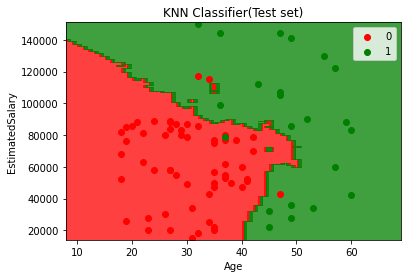

In [42]:
x_set,y_set = sc.inverse_transform(X_test),y_test
X1,X2 = np.meshgrid(np.arange(start = x_set[:,0].min()-10, stop = x_set[:,0].max()+10,step = 1),
                   np.arange(start = x_set[:,1].min()-1000, stop = x_set[:,1].max()+1000,step = 1))
plt.contourf(X1,X2,classifier.predict(sc.transform(np.array([X1.ravel(),X2.ravel()]).T)).reshape(X1.shape),
        alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0],x_set[y_set == j,1],c = ListedColormap(('red','green'))(i),label = j)
plt.title('KNN Classifier(Test set)')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.legend()
plt.show()
